In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score, cohen_kappa_score, fbeta_score
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt

In [2]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [3]:
df_dum = pd.get_dummies(df.drop(columns=['id']), columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 
                                     'work_type', 'Residence_type', 'smoking_status'])

X = df_dum.drop('stroke', axis=1)
y = df_dum.stroke.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df_dum.stroke.values)

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train["bmi"] = imp.fit_transform(X_train[["bmi"]]).ravel()

/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# Random Forest

rf = RandomForestClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=6)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=6, random_state=0)

In [6]:
X_test["bmi"] = imp.transform(X_test[["bmi"]]).ravel()

/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
y_pred = rf.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.14      0.02      0.03        62

    accuracy                           0.95      1278
   macro avg       0.55      0.51      0.50      1278
weighted avg       0.91      0.95      0.93      1278



In [9]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3645
           1       0.97      0.15      0.26       187

    accuracy                           0.96      3832
   macro avg       0.96      0.57      0.62      3832
weighted avg       0.96      0.96      0.94      3832



In [10]:
print('test set', accuracy_score(y_test, y_pred))
print('train set', accuracy_score(y_train, rf.predict(X_train)))

test set 0.9475743348982786
train set 0.9582463465553236


In [11]:
params = {'n_estimators': [5, 6, 7, 8, 9, 10], 'max_depth': [4, 6, 8, 10, 12, 14], 
          'min_samples_split': [1, 2, 6, 10], 'min_samples_leaf': [1, 2, 6, 10]}


gs = GridSearchCV(rf, params, scoring='f1', cv=5,  n_jobs=-1, verbose=10)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
        nan        nan        nan        nan        nan        nan
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
        nan        nan        nan        nan        nan        nan
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
        nan        nan        nan        nan        nan        nan
 0.         0.         0.         0.   

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=6,
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14],
                         'min_samples_leaf': [1, 2, 6, 10],
                         'min_samples_split': [1, 2, 6, 10],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             scoring='f1', verbose=10)

In [12]:
gs.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 6}

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

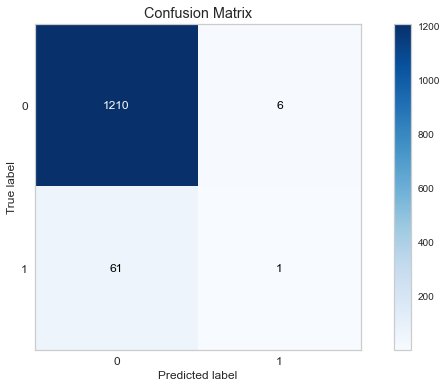

In [13]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12, 6))

<AxesSubplot:>

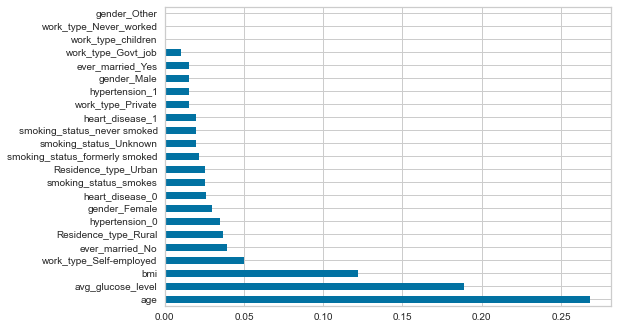

In [14]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(len(feat_imp)).plot(kind='barh')

In [15]:
feat_imp.sort_values(ascending=False)

age                               2.682255e-01
avg_glucose_level                 1.890012e-01
bmi                               1.219824e-01
work_type_Self-employed           5.009377e-02
ever_married_No                   3.918133e-02
Residence_type_Rural              3.683790e-02
hypertension_0                    3.497474e-02
gender_Female                     2.991333e-02
heart_disease_0                   2.596694e-02
smoking_status_smokes             2.568779e-02
Residence_type_Urban              2.530800e-02
smoking_status_formerly smoked    2.181951e-02
smoking_status_Unknown            1.978763e-02
smoking_status_never smoked       1.966738e-02
heart_disease_1                   1.943334e-02
work_type_Private                 1.564458e-02
hypertension_1                    1.549167e-02
gender_Male                       1.529787e-02
ever_married_Yes                  1.507962e-02
work_type_Govt_job                1.044138e-02
work_type_children                1.635876e-04
work_type_Nev

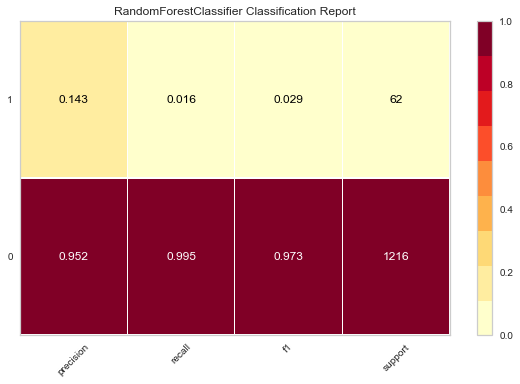

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [16]:
visualizer = ClassificationReport(rf, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [17]:
print('train set', cohen_kappa_score(y_train, rf.predict(X_train)))
print('test set', cohen_kappa_score(y_test, y_pred))

train set 0.24942401813761383
test set 0.019332523993861095


In [18]:
print('train set', fbeta_score(y_train, rf.predict(X_train), beta=2.0))
print('test set', fbeta_score(y_test, y_pred, beta=2.0))

train set 0.18018018018018014
test set 0.0196078431372549


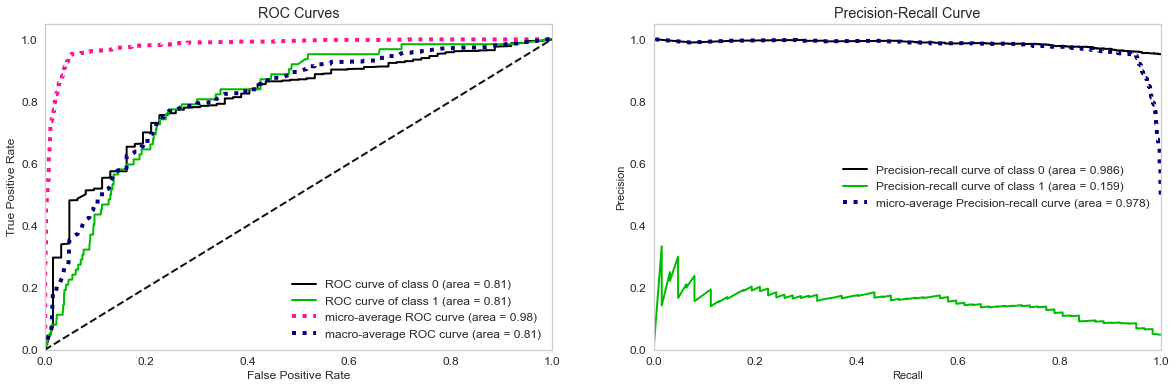

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
skplt.metrics.plot_roc(y_test, rf.predict_proba(X_test), figsize=(10, 6), ax=ax1)
skplt.metrics.plot_precision_recall(y_test, rf.predict_proba(X_test), figsize=(10, 6), ax=ax2)
ax1.grid()
ax2.grid()